<a href="https://www.kaggle.com/code/mehmetcubukcu/vehicle-detection-yolov8?scriptVersionId=174442614" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 752.1/752.1 kB 13.5 MB/s eta 0:00:00


In [2]:
!pip install tensorflow==2.13.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.7/479.7 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 22.3 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:
      Successfully uninstalled typing_extensions-4.9.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: keras
    Found existing

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import wandb
from kaggle_secrets import UserSecretsClient
from ultralytics import YOLO

In [4]:
user_secrets = UserSecretsClient()

my_secret = user_secrets.get_secret("wandb_api_key") 

wandb.login(key=my_secret)

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

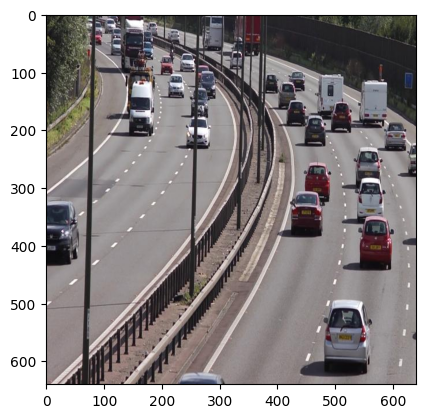

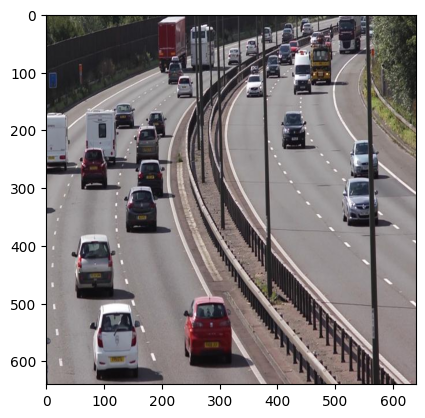

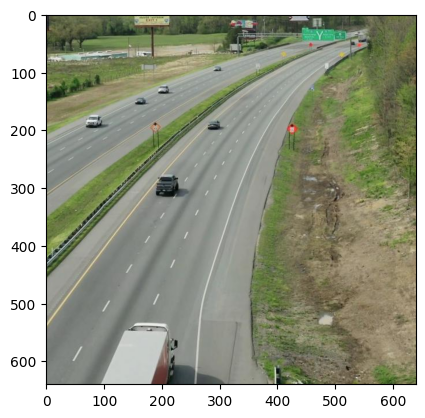

In [5]:
sample1 = mpimg.imread('/kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/train/images/10_mp4-21_jpg.rf.fdf9ca13094603f25c5323c71537b39c.jpg')
sample2 = mpimg.imread('/kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/valid/images/10_mp4-16_jpg.rf.b01cbf556a5a2c4154322deda0339880.jpg')
sample3 = mpimg.imread('/kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/valid/images/12_mp4-27_jpg.rf.2b272befa75f6ccd269223ccc84e5391.jpg')
plt.imshow(sample1)
plt.show()
plt.imshow(sample2)
plt.show()
plt.imshow(sample3)
plt.show()

In [6]:
# Load a model
model = YOLO('yolov8n.pt')


# Train the model
results = model.train(data='/kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/data.yaml', epochs=30, imgsz=640)

100%|██████████| 6.23M/6.23M [00:00<00:00, 21.2MB/s]


Ultralytics YOLOv8.2.4 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False

100%|██████████| 755k/755k [00:00<00:00, 4.01MB/s]
2024-04-28 10:38:04,111	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-04-28 10:38:05,523	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

wandb: Currently logged in as: m4257066 (hjty). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.16.6
wandb: Run data is saved locally in /kaggle/working/wandb/run-20240428_103810-qlvl8gid
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run train
wandb: ⭐️ View project at https://wandb.ai/hjty/YOLOv8
wandb: 🚀 View run at https://wandb.ai/hjty/YOLOv8/runs/qlvl8gid


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/train/labels... 536 images, 0 backgrounds, 0 corrupt: 100%|██████████| 536/536 [00:02<00:00, 230.57it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/valid/labels... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<00:00, 223.79it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.49G      1.266      1.793      1.041        170        640: 100%|██████████| 34/34 [00:12<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.60it/s]

                   all         90        937     0.0553      0.894      0.584       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30       2.5G      1.175     0.9518      1.019        125        640: 100%|██████████| 34/34 [00:07<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.17it/s]

                   all         90        937      0.835      0.474       0.72      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30       2.5G      1.173      0.909      1.018        137        640: 100%|██████████| 34/34 [00:06<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]

                   all         90        937       0.51      0.592        0.5      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.48G      1.135     0.8432      1.012        119        640: 100%|██████████| 34/34 [00:06<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.06it/s]

                   all         90        937      0.858      0.819        0.9      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.56G      1.145     0.8145      1.007        130        640: 100%|██████████| 34/34 [00:06<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.22it/s]

                   all         90        937      0.819      0.862        0.9      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.49G       1.09     0.7409     0.9849        136        640: 100%|██████████| 34/34 [00:06<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.01it/s]

                   all         90        937      0.866      0.905      0.943      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.49G      1.084     0.7284      0.991        115        640: 100%|██████████| 34/34 [00:06<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.09it/s]

                   all         90        937      0.846      0.882      0.935      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.39G      1.086      0.719      0.994        139        640: 100%|██████████| 34/34 [00:06<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.49it/s]

                   all         90        937      0.879      0.914      0.963      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.48G      1.068      0.674     0.9805        172        640: 100%|██████████| 34/34 [00:06<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]

                   all         90        937      0.901      0.916      0.971      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.41G      1.063     0.6651     0.9767        131        640: 100%|██████████| 34/34 [00:06<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.28it/s]

                   all         90        937      0.882       0.92      0.961      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.51G      1.043     0.6451     0.9671         85        640: 100%|██████████| 34/34 [00:06<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.39it/s]


                   all         90        937      0.878      0.916       0.95      0.665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.41G      1.033     0.6415      0.967        107        640: 100%|██████████| 34/34 [00:06<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.73it/s]


                   all         90        937      0.882      0.937      0.969        0.7

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.54G      1.036     0.6364     0.9694        147        640: 100%|██████████| 34/34 [00:06<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.04it/s]

                   all         90        937      0.912      0.904      0.965      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.41G      1.027     0.6335       0.97        137        640: 100%|██████████| 34/34 [00:06<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.72it/s]

                   all         90        937      0.899      0.916      0.963      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.48G      1.018     0.6111     0.9623        104        640: 100%|██████████| 34/34 [00:06<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.43it/s]

                   all         90        937      0.907      0.925      0.961      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.51G      0.998     0.6033     0.9576        163        640: 100%|██████████| 34/34 [00:06<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.52it/s]


                   all         90        937      0.901      0.909       0.96       0.68

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.49G      1.004     0.5919     0.9555        139        640: 100%|██████████| 34/34 [00:06<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.92it/s]

                   all         90        937      0.882      0.908      0.945       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30       2.5G     0.9964     0.5791     0.9536        100        640: 100%|██████████| 34/34 [00:06<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.71it/s]

                   all         90        937      0.921       0.92       0.97      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30       2.4G      0.976     0.5693     0.9489        131        640: 100%|██████████| 34/34 [00:06<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.59it/s]


                   all         90        937      0.916      0.921      0.973      0.719

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30       2.5G     0.9695     0.5637     0.9468         53        640: 100%|██████████| 34/34 [00:06<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.65it/s]


                   all         90        937      0.915      0.936      0.973       0.71
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.39G     0.9682     0.5428     0.9519         66        640: 100%|██████████| 34/34 [00:10<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.70it/s]


                   all         90        937      0.911      0.923       0.97      0.704

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.38G     0.9638     0.5384     0.9552         55        640: 100%|██████████| 34/34 [00:06<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.80it/s]


                   all         90        937      0.907      0.939      0.963      0.712

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.38G      0.935     0.5196     0.9475        121        640: 100%|██████████| 34/34 [00:06<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.81it/s]

                   all         90        937      0.904      0.909      0.963      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.33G     0.9246     0.5063     0.9389         63        640: 100%|██████████| 34/34 [00:06<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.26it/s]

                   all         90        937      0.912      0.934      0.973      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.39G     0.9309     0.4992     0.9399         60        640: 100%|██████████| 34/34 [00:06<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.99it/s]

                   all         90        937      0.918      0.919      0.972      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.38G     0.9138     0.4931     0.9348        100        640: 100%|██████████| 34/34 [00:06<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.13it/s]

                   all         90        937      0.907      0.933       0.97      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.39G     0.8995     0.4812     0.9283         64        640: 100%|██████████| 34/34 [00:06<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.73it/s]

                   all         90        937      0.938      0.918      0.974      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.38G     0.8948     0.4787     0.9233         79        640: 100%|██████████| 34/34 [00:06<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.97it/s]

                   all         90        937      0.917      0.923      0.971      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.39G     0.8901     0.4694     0.9201         44        640: 100%|██████████| 34/34 [00:06<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.03it/s]

                   all         90        937       0.91      0.947      0.969      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.37G     0.8715     0.4652      0.919         71        640: 100%|██████████| 34/34 [00:06<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.87it/s]

                   all         90        937      0.938      0.921       0.97      0.732



30 epochs completed in 0.073 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.4 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.15s/it]


                   all         90        937      0.909      0.947      0.969      0.732
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/train


wandb:                                                                                
wandb: 
wandb: Run history:
wandb:                  lr/pg0 ▃▆███▇▇▇▇▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▁▁
wandb:                  lr/pg1 ▃▆███▇▇▇▇▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▁▁
wandb:                  lr/pg2 ▃▆███▇▇▇▇▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▁▁
wandb:        metrics/mAP50(B) ▂▄▁▇▇█▇███████████████████████
wandb:     metrics/mAP50-95(B) ▂▃▁▆▆▇▇▇▇▇▇▇▇▇█▇▇▇██▇█████████
wandb:    metrics/precision(B) ▁▇▅▇▇▇▇███████████████████████
wandb:       metrics/recall(B) ▇▁▃▆▇▇▇█████▇██▇▇█████▇███████
wandb:            model/GFLOPs ▁
wandb:        model/parameters ▁
wandb: model/speed_PyTorch(ms) ▁
wandb:          train/box_loss █▆▆▆▆▅▅▅▄▄▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▁▁▁▁
wandb:          train/cls_loss █▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
wandb:          train/dfl_loss █▇▇▆▆▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▃▃▃▂▂▂▂▁▁▁
wandb:            val/box_loss ▆██▇▆▄▆▄▄▄▄▃▃▂▂▄▃▃▂▃▃▂▂▂▂▁▁▁▁▁
wandb:            val/cls_loss █▆▅▃▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:            val/dfl_loss ▂▄█▅▄▃▄▂▃▃▃

In [7]:
# Load a model
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt') 

# Validate the model
metrics = model.val() 

Ultralytics YOLOv8.2.4 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/valid/labels... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<00:00, 904.97it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.39s/it]


                   all         90        937       0.91      0.947      0.969      0.732
Speed: 0.2ms preprocess, 5.0ms inference, 0.0ms loss, 14.1ms postprocess per image
Results saved to runs/detect/val


In [8]:
model("/kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/valid/images/3_mp4-8_jpg.rf.4a784fedfdd385032614371ea5cb78fa.jpg", save=True)


image 1/1 /kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/valid/images/3_mp4-8_jpg.rf.4a784fedfdd385032614371ea5cb78fa.jpg: 640x640 2 Vehicles, 6.6ms
Speed: 2.1ms preprocess, 6.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Vehicle'}
 obb: None
 orig_img: array([[[ 65, 111, 112],
         [ 75, 121, 122],
         [ 82, 126, 127],
         ...,
         [ 57,  78,  63],
         [ 36,  59,  44],
         [ 18,  41,  26]],
 
        [[ 64, 110, 111],
         [ 63, 109, 110],
         [ 72, 116, 117],
         ...,
         [ 49,  70,  55],
         [ 28,  51,  36],
         [ 13,  36,  21]],
 
        [[ 73, 118, 121],
         [ 57, 102, 105],
         [ 65, 108, 111],
         ...,
         [ 44,  65,  50],
         [ 24,  47,  32],
         [ 16,  39,  24]],
 
        ...,
 
        [[143, 146, 161],
         [142, 145, 160],
         [141, 144, 159],
         ...,
         [127, 134, 149],
         [126, 133, 148],
         [130, 137, 152]],
 
        [[142, 145, 160],
         [141, 144, 159],
         [141, 144, 159],
         ...,
         [129, 13

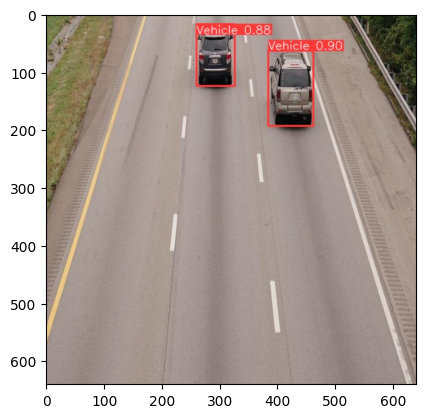

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
test = mpimg.imread('/kaggle/working/runs/detect/predict/3_mp4-8_jpg.rf.4a784fedfdd385032614371ea5cb78fa.jpg')
plt.imshow(test)

In [10]:
# Export the model
model.export(format='tflite')

Ultralytics YOLOv8.2.4 🚀 Python-3.10.13 torch-2.1.2 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from '/kaggle/working/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx2tf>=1.15.4,<=1.17.5', 'sng4onnx>=1.0.1', 'onnxsim>=0.4.33', 'onnx_graphsurgeon>=0.3.26', 'tflite_support', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.8/127.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 207.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 MB 224.1 MB/s eta 0:00:00
   ━━━

100%|██████████| 1.11M/1.11M [00:00<00:00, 5.98MB/s]
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /kaggle/working/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 41.49file/s]


ONNX: starting export with onnx 1.16.0 opset 17...


ONNX: simplifying with onnxsim 0.4.36...
ONNX: export success ✅ 1.7s, saved as '/kaggle/working/runs/detect/train/weights/best.onnx' (11.7 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.17.5...
TensorFlow SavedModel: export success ✅ 40.4s, saved as '/kaggle/working/runs/detect/train/weights/best_saved_model' (29.5 MB)

TensorFlow Lite: starting export with tensorflow 2.13.1...
TensorFlow Lite: export success ✅ 0.0s, saved as '/kaggle/working/runs/detect/train/weights/best_saved_model/best_float32.tflite' (11.7 MB)

Export complete (41.9s)
Results saved to /kaggle/working/runs/detect/train/weights
Predict:         yolo predict task=detect model=/kaggle/working/runs/detect/train/weights/best_saved_model/best_float32.tflite imgsz=640  
Validate:        yolo val task=detect model=/kaggle/working/runs/detect/train/weights/best_saved_model/best_float32.tflite imgsz=640 data=/kaggle/input/top-view-vehicle-detection-image-dataset/Vehicle_Detection_Image_Dataset/data.yaml  
V

'/kaggle/working/runs/detect/train/weights/best_saved_model/best_float32.tflite'